1. Charger le dataset (iris)
1. Isoler
1. split_train_test
1. PCA() -> afficher la courbe
1. PCA(n_components=?) fit -> transform()
1. knn.fit(X_tr_PCA)
1. Accuracy

In [3]:
# import des librairies
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

In [4]:
# Import du dataset
iris = sns.load_dataset('iris')

In [6]:
# Isoler X et Y
X = iris.drop('species', axis='columns')
Y = iris['species'].astype('category').cat.codes

In [39]:
# Split train test
from sklearn.model_selection import train_test_split

splits = train_test_split(X, Y, random_state=97, stratify=Y)

X_tr, X_te, Y_tr, Y_te = splits

/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphe pour choisir le nombre de PC')

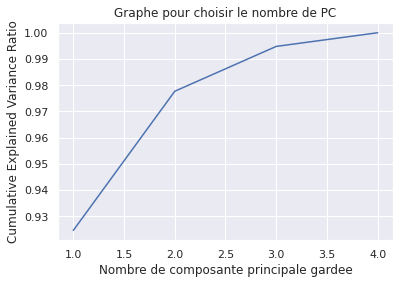

In [9]:
# Affichage courbe
from sklearn.decomposition import PCA
# Hyper parametre n_component non precise au debut
pca = PCA()
pca.fit(X)

import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([1, 2, 3, 4], cumsum)
plt.xlabel('Nombre de composante principale gardee')
plt.ylabel('Cumulative Explained Variance Ratio') # Ratio d'Informations (==variance) Conservees
plt.title('Graphe pour choisir le nombre de PC')

In [40]:
# Fit encore apres determination de n_components
pca = PCA(n_components=2)
pca.fit(X_tr)

PCA(n_components=2)

In [41]:
# Transformer le PCA
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)
knn.fit(X_tr_PCA, Y_tr)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# Accuracy
def accuracy(preds, target):
    M = target.shape[0] # Nombre de lignes
    total_correctes = (preds == target).sum()
    return total_correctes / M # Accuracy

predictions = knn.predict(X_te_PCA)
accuracy(predictions, Y_te)

0.9736842105263158